<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2024S2/blob/main/Lab_4_Clustering_PCA_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

## **Lab: Clustering + PCA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix


# Clustering

Considere o seguinte conjunto de dados de imóveis.

In [ ]:
df = pd.read_csv('https://github.com/INRIA/scikit-learn-mooc/raw/refs/heads/main/datasets/ames_housing_no_missing.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


# Pré-Exercício. Pré-Processamento.

Para Clusterização, vamos considerar somente os atributos numéricos. Crie então um novo conjunto de dados somente com os atributos numéricos e normalizados (`StandardScaler()`).



In [ ]:
numerical_features = df.select_dtypes(include=np.number)

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

In [ ]:
#@markdown sanity check, must be `True`
scaled_data.sum().sum() == 6.917133532624575e-11

True

# Exercício 1. Kmeans, silhueta.

Empregue o método da silhueta para definir o melhor número de clusters k-médias, de 2 a 10 clusters. Empregue no KMeans, `random_state=1`.



## **Q1. Qual o melhor número de clusters (kmeans) encontrado e o respectivo valor médio de silhueta?**

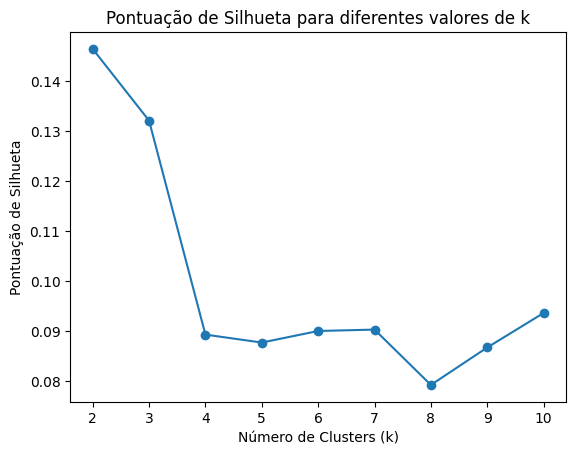

O melhor número de clusters (k) com base na silhueta é: 2, com score de 0.147


In [ ]:
# Calcular a pontuação de silhueta para diferentes valores de k

silhouette_scores = []
for k in range(2, 11):  # Começar com 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plotar a pontuação de silhueta para diferentes valores de k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Pontuação de Silhueta para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Pontuação de Silhueta')
plt.show()

# Encontrar o melhor valor de k com base na pontuação de silhueta máxima
best_k = np.argmax(silhouette_scores) + 2  # Adicionar 2 para obter o valor de k correto
print(f"O melhor número de clusters (k) com base na silhueta é: {best_k}, com score de {silhouette_scores[np.argmax(silhouette_scores)]:.3f}")

In [ ]:
silhouette_scores

[0.14650993675423443,
 0.1321648356845472,
 0.08936499726431126,
 0.08777994972488665,
 0.09008928491873368,
 0.09037257481099895,
 0.07930317198974149,
 0.08678980026047134,
 0.09368997988900102]

# Exercício 2. Kmeans

Faça a clusterização Kmeans com o melhor número de cluster encontrado no exercício anterior. Empregue no KMeans, `random_state=1`.

## **Q2. (Kmeans) Qual a quantidade de elementos em cada cluster?**

## **Q3. (Kmeans) Qual média de preço (`SalePrice`) de cada agrupamento?**

## **Q4. (Kmeans) A que clusters foram assinalados os imóveis de índices 0,5,9,12,221 ?**

In [ ]:
# Definir o número de clusters (k)
k = 2

# Criar e treinar o modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(scaled_data)

# Atribuir os rótulos de cluster aos dados
df['cluster'] = kmeans.labels_



In [ ]:
df.groupby('cluster')['SalePrice'].agg(['mean', 'count'])

,mean,count
cluster,,
0,237917.816839,677
1,131640.592593,783


In [ ]:
df.iloc[[0,5,9,12,221]]['cluster']

,cluster
0,0
5,1
9,1
12,1
221,0


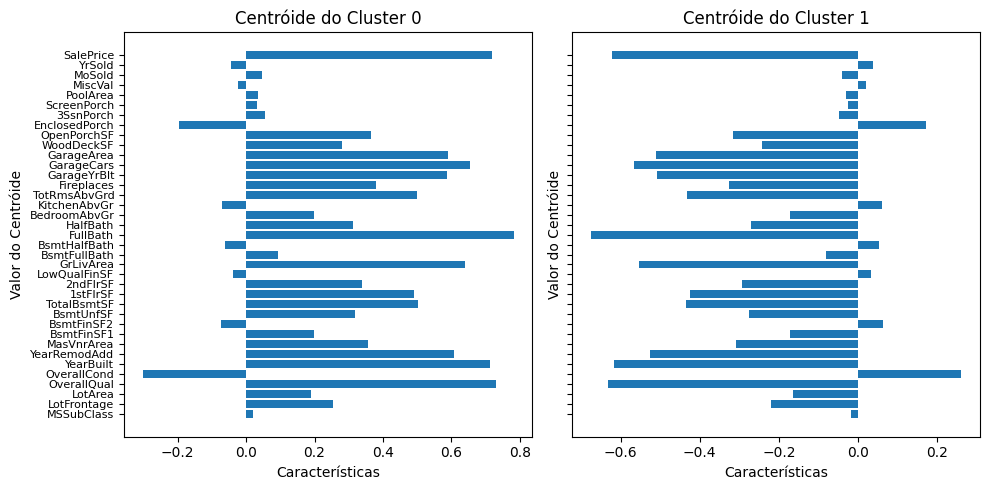

In [ ]:
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots(1, len(centroids), figsize=(10, 5), sharey=True)

# Criar um gráfico de barras para cada centróide

for i, centroid in enumerate(centroids):

  ax[i].barh(numerical_features.columns, centroid)
  ax[i].set_title(f'Centróide do Cluster {i}')
  ax[i].set_xlabel('Características')
  ax[i].set_ylabel('Valor do Centróide')
  ax[i].set_yticks(range(len(numerical_features.columns)))
  ax[i].set_yticklabels(numerical_features.columns, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

# Exercício 2b. Kmeans, Elbow **(Resolvido)**

## **Q*. O método do cotovelo, confirma o mesmo melhor número de clusters que pelo critério de silhueta?**

In [ ]:
%%script echo skipping
# Calcular a inércia para diferentes valores de k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

skipping


# Exercício 3. HCluster

Empregue o método da silhueta para definir o melhor número de clusters hierárquicos, de 2 a 10 clusters. Empregue a métrica e o linkage padrão. Em seguida faça a clusterização hierárquica empregando o melhor número de clusters.

## **Q5. (HCluster) Qual o melhor número de clusters encontrado e o respectivo valor médio de silhueta?**

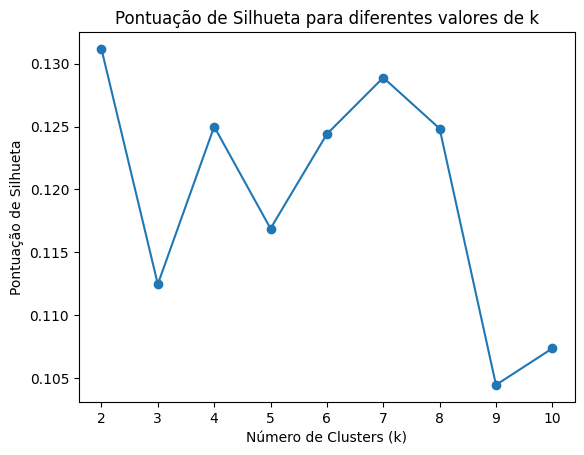

O melhor número de clusters (k) com base na silhueta é: 2, com score de 0.131


In [ ]:
# Calcular a pontuação de silhueta para diferentes valores de k

silhouette_scores = []
for k in range(2, 11):  # Começar com 2 clusters
    Agglomerative = AgglomerativeClustering(n_clusters=k)
    Agglomerative.fit(scaled_data)
    labels = Agglomerative.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plotar a pontuação de silhueta para diferentes valores de k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Pontuação de Silhueta para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Pontuação de Silhueta')
plt.show()

# Encontrar o melhor valor de k com base na pontuação de silhueta máxima
best_k = np.argmax(silhouette_scores) + 2  # Adicionar 2 para obter o valor de k correto
print(f"O melhor número de clusters (k) com base na silhueta é: {best_k}, com score de {silhouette_scores[np.argmax(silhouette_scores)]:.3f}")

## **Q6. (HCluster) Qual a quantidade de elementos em cada cluster?**

## **Q7. (HCluster) Qual média de preço (`SalePrice`) de cada agrupamento?**

## **Q8. (HCluster) A que clusters foram assinalados os imóveis de índices 0,5,9,12,221 ?**

In [ ]:
k = 2

# Criar e treinar o modelo Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_clustering.fit(scaled_data)

# Atribuir os rótulos de cluster aos dados
df['cluster_agg'] = agg_clustering.labels_

In [ ]:
df.groupby('cluster_agg')['SalePrice'].agg(['mean', 'count'])

,mean,count
cluster_agg,,
0,243067.435644,606
1,136822.107728,854


In [ ]:
df.iloc[[0,5,9,12,221]]['cluster_agg']

,cluster_agg
0,0
5,0
9,1
12,1
221,0


# Exercício 4. Kmeans x HCluster



## **Q9. Qual o percentual de "coincidência" dos grupos assinalados para os imóveis entre os métodos Kmeans e HCluster (isto é, que imóveis foram agrupados no mesmo cluster nos dois métodos)?**

**Dica:** você pode querer empregar uma matriz de confusão.

Note, que os agrupamentos poderiam ter rótulos diferentes no Kmeans e no HCluster. Por exemplo, supondo que os clusters separam imóveis "caros" e "baratos", o Kmeans poderia ter colocado os imóveis "caros" em 1, e os "baratos" em 0, enquanto o HCluster poderia ter colocado os imóveis "caros" em 0, e os "baratos" em 1. Neste caso, você deveria considerar os rótulos trocados, considerando como a mesmo agrupamento imóveis Kmeans(0) e HCluster(1), ambos de imóveis baratos.

[[566  40]
 [111 743]]


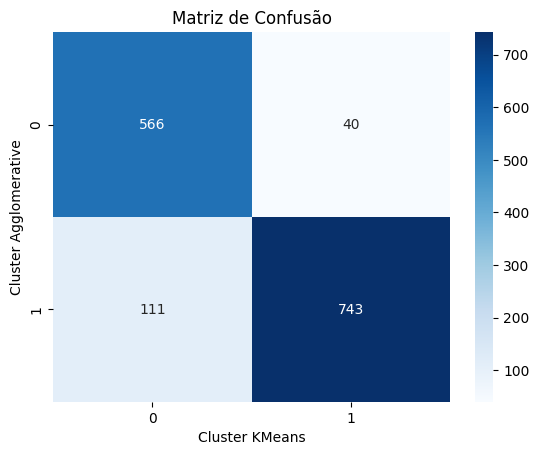

A coincidência entre os grupos é de: 0.897


In [ ]:
df['cluster'] = kmeans.labels_

# Calcular a matriz de confusão
cm = confusion_matrix(df['cluster_agg'], df['cluster'])

# Imprimir a matriz de confusão
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster KMeans')
plt.ylabel('Cluster Agglomerative')
plt.title('Matriz de Confusão')
plt.show()

print(f"A coincidência entre os grupos é de: {np.trace(cm)/np.sum(cm):.3f}")


# Exercício 5. PCA

(Pesquise como aplicar o PCA). Empregue a técnica de PCA (Principal Component Analysis) para reduzir o número de features dos dados (os dados numéricos normalizados, `scaled_data`) ao número de componentes principais que apresente no mínimo 80% da variância dos dados. Com esse número reduzido de features faça a mesma clusterização hierárquica aplicada anteriormente (número de clusters e demais parâmetros).



## **Q10. Qual a quantidade componentes principais que apresenta no mínimo 80% da variância dos dados? Qual o % de variância que é atingido com esse(s) componentes?**



## **Q11. Qual o percentual de "coincidência" dos grupos assinalados para os imóveis entre os métodos HCluster e HCluster empregando somente os componente principais?**

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA com 0.8 de variância explicada
pca = PCA(n_components=0.8)
pca_data = pca.fit_transform(numerical_features)

# Imprimir a quantidade de componentes principais retidos
print(f"Número de componentes principais retidos: {pca.n_components_}")

# Criar um novo DataFrame com os componentes principais
df_pca = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Visualizar o novo DataFrame
print(df_pca.head())

Número de componentes principais retidos: 1
            PC1
0  27493.440435
1    547.640093
2  42579.377054
3 -40929.823237
4  69169.681132


In [ ]:
pca.explained_variance_ratio_

array([0.985367])

In [ ]:
k = 2

# Criar e treinar o modelo Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_clustering.fit(df_pca)

# Atribuir os rótulos de cluster aos dados
df['cluster_pca'] = agg_clustering.labels_

[[353 253]
 [ 27 827]]


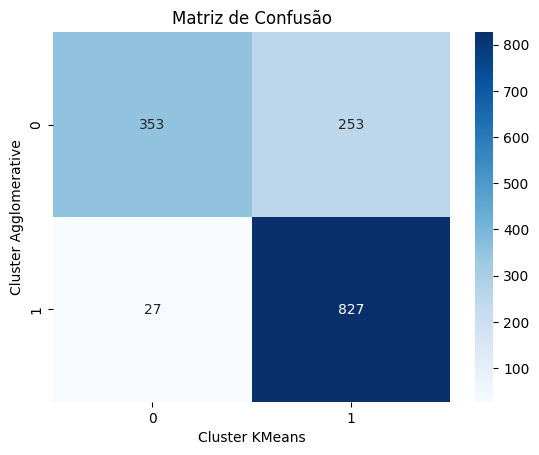

A coincidência entre os grupos é de: 0.808


In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(df['cluster_agg'], df['cluster_pca'])

# Imprimir a matriz de confusão
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster KMeans')
plt.ylabel('Cluster Agglomerative')
plt.title('Matriz de Confusão')
plt.show()

print(f"A coincidência entre os grupos é de: {np.trace(cm)/np.sum(cm):.3f}")